# Sequencing Error Analysis

In [1]:
# Import packages.
from matplotlib import pyplot as plt
import msprime
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm

## Whole-Genome

In [2]:
# Define a function to extract observed introgression values.
def iua_obs_vals(n, f):
    # Define the path to the results. 
    path = '/users/dpeede/data/data/empirical_intro_stat_benchmarking/anc-der-intro-proj/simulations'
    # If the sample size is 1...
    if (n == 1):        
        # Define the file path for the results.
        results_path = path+'/sim_outputs/n_1/{0}/obs_vals/'.format(f)
        # Load observed site patterns.
        obs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        obs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        obs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        obs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Load observed introgression values.
        obs_d = np.loadtxt(
            results_path+'d.csv.gz',
            delimiter=',',
        )
        obs_danc = np.loadtxt(
            results_path+'danc.csv.gz',
            delimiter=',',
        )
        obs_dplus = np.loadtxt(
            results_path+'dplus.csv.gz',
            delimiter=',',
        )
        obs_fhom = np.loadtxt(
            results_path+'fhom.csv.gz',
            delimiter=',',
        )
        obs_fanc = np.loadtxt(
            results_path+'fanc.csv.gz',
            delimiter=',',
        )
        obs_fplus = np.loadtxt(
            results_path+'fplus.csv.gz',
            delimiter=',',
        )
    # Else...
    else:
        # Define the file path for the results.
        results_path = path+'/sim_outputs/n_100/{0}/obs_vals/rep_id_'.format(f)
        # Intialize obsrved value arrays.
        obs_abba = np.array([])
        obs_baba = np.array([])
        obs_baaa = np.array([])
        obs_abaa = np.array([])
        obs_d = np.array([])
        obs_danc = np.array([])
        obs_dplus = np.array([])
        obs_fhom = np.array([])
        obs_fanc = np.array([])
        obs_fplus = np.array([])
        # For all replicates.
        for rep_id in range(1, 101):
            # Load the observed values.
            site_patterns = np.loadtxt(
                results_path+'{0}_obs_site_patterns.csv.gz'.format(rep_id),
                delimiter=',',
            )
            detection = np.loadtxt(
                results_path+'{0}_obs_detection_metrics.csv.gz'.format(rep_id),
                delimiter=',',
            )
            quantification = np.loadtxt(
                results_path+'{0}_obs_quantification_metrics.csv.gz'.format(rep_id),
                delimiter=',',
            )
            # Append the observed value arrays.
            obs_abba = np.append(obs_abba, site_patterns[0])
            obs_baba = np.append(obs_baba, site_patterns[1])
            obs_baaa = np.append(obs_baaa, site_patterns[3])
            obs_abaa = np.append(obs_abaa, site_patterns[4])
            obs_d = np.append(obs_d, detection[0])
            obs_danc = np.append(obs_danc, detection[1])
            obs_dplus = np.append(obs_dplus, detection[2])
            obs_fhom = np.append(obs_fhom, quantification[0])
            obs_fanc = np.append(obs_fanc, quantification[1])
            obs_fplus = np.append(obs_fplus, quantification[2])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    obs_vals_dict = {
        'abba': obs_abba, 'baaa': obs_baaa,
        'baba': obs_baba, 'abaa': obs_abaa,
        'd': obs_d,       'danc': obs_danc,
        'fhom': obs_fhom, 'fanc': obs_fanc,
        'dplus': obs_dplus, 'fplus': obs_fplus,
    }
    return obs_vals_dict

In [3]:
# Define a function to calculate the standard deviations of each bootstrapped distribution.
def iua_bs_stds(n, f):
    # Define the path to the results. 
    path = '/users/dpeede/data/data/empirical_intro_stat_benchmarking/anc-der-intro-proj/simulations'
    # Intialize bootstrapped standard deviation arrays.
    std_d = np.array([])
    std_danc = np.array([])
    std_dplus = np.array([])
    # Calculate the bootstrapped standard deviation for all replicate simulations.
    for rep_id in range(1, 101):
        # Define the file path for the results.
        results_path = path+'/sim_outputs/n_{0}/{1}/bootstraps/rep_id_{2}_'.format(n, f, rep_id)
        # Load the bootstrapped distributions.
        bs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        bs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        bs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        bs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Calculate bootstrapped introgression values.
        bs_d = ((bs_abba - bs_baba) / (bs_abba + bs_baba))
        bs_danc = ((bs_baaa - bs_abaa) / (bs_baaa + bs_abaa))
        bs_dplus = (((bs_abba - bs_baba) + (bs_baaa - bs_abaa)) / ((bs_abba + bs_baba) + (bs_baaa + bs_abaa)))
        # Calculate the standard deviations of each bootstrapped distribution.
        bs_std_d = np.std(bs_d)
        bs_std_danc = np.std(bs_danc)
        bs_std_dplus = np.std(bs_dplus)
        # Store the bootstrapped results for the replicate.
        std_d = np.append(std_d, bs_std_d)
        std_danc = np.append(std_danc, bs_std_danc)
        std_dplus = np.append(std_dplus, bs_std_dplus)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    bs_std_dict = {
        'd': std_d, 'danc': std_danc, 'dplus': std_dplus,
    }
    return bs_std_dict

In [4]:
# Define a function to calculate p-values for introgression detection metrics.
def iua_p_values(n, f):
    # Load the observed values.
    obs_dict = iua_obs_vals(n, f)
    # Load the bootstrapped standard deviations.
    bs_dict = iua_bs_stds(n, f)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=obs_dict['d'], loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=obs_dict['danc'], loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=obs_dict['dplus'], loc=0, scale=bs_dict['dplus'])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    pval_dict = {
        'd': d_pval, 'danc': danc_pval, 'dplus': dplus_pval,
    }
    return pval_dict

In [5]:
# Define a function to calculate power for introgression detection metrics.
def iua_power(n, f):
    # Load the observed values.
    obs_dict = iua_obs_vals(n, f)
    # Load the bootstrapped standard deviations.
    bs_dict = iua_bs_stds(n, f)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Calculate the power ie the number of significant replicates out of 100.
    d_power = np.mean(d_pval < 0.05 )
    danc_power = np.mean(danc_pval < 0.05 )
    dplus_power = np.mean(dplus_pval < 0.05 )
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    power_dict = {
        'd': d_power, 'danc': danc_power, 'dplus': dplus_power,
    }
    return power_dict

In [6]:
# Define a function to extract observed introgression values.
def err_obs_vals(err_pop):
    # Define the file path for the results.
    results_path = './seq_errors/obs_vals/{0}/'.format(err_pop)
    # Load observed site patterns.
    obs_abba = np.loadtxt(
        results_path+'abba.csv.gz',
        delimiter=',',
    )
    obs_baba = np.loadtxt(
        results_path+'baba.csv.gz',
        delimiter=',',
    )
    obs_baaa = np.loadtxt(
        results_path+'baaa.csv.gz',
        delimiter=',',
    )
    obs_abaa = np.loadtxt(
        results_path+'abaa.csv.gz',
        delimiter=',',
    )
    # Load observed introgression values.
    obs_d = np.loadtxt(
        results_path+'d.csv.gz',
        delimiter=',',
    )
    obs_danc = np.loadtxt(
        results_path+'danc.csv.gz',
        delimiter=',',
    )
    obs_dplus = np.loadtxt(
        results_path+'dplus.csv.gz',
        delimiter=',',
    )
    obs_fhom = np.loadtxt(
        results_path+'fhom.csv.gz',
        delimiter=',',
    )
    obs_fanc = np.loadtxt(
        results_path+'fanc.csv.gz',
        delimiter=',',
    )
    obs_fplus = np.loadtxt(
        results_path+'fplus.csv.gz',
        delimiter=',',
    )
    
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    obs_vals_dict = {
        'abba': obs_abba, 'baaa': obs_baaa,
        'baba': obs_baba, 'abaa': obs_abaa,
        'd': obs_d,       'danc': obs_danc,
        'fhom': obs_fhom, 'fanc': obs_fanc,
        'dplus': obs_dplus, 'fplus': obs_fplus,
    }
    return obs_vals_dict

In [7]:
# Define a function to calculate the standard deviations of each bootstrapped distribution.
def err_bs_stds(err_pop):
    # Intialize bootstrapped standard deviation arrays.
    std_d = np.array([])
    std_danc = np.array([])
    std_dplus = np.array([])
    # Calculate the bootstrapped standard deviation for all replicate simulations.
    for rep_id in range(1, 101):
        # Define the file path for the results.
        results_path = './seq_errors/bootstraps/{0}/rep_id_{1}_'.format(err_pop, rep_id)
        # Load the bootstrapped distributions.
        bs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        bs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        bs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        bs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Calculate bootstrapped introgression values.
        bs_d = ((bs_abba - bs_baba) / (bs_abba + bs_baba))
        bs_danc = ((bs_baaa - bs_abaa) / (bs_baaa + bs_abaa))
        bs_dplus = (((bs_abba - bs_baba) + (bs_baaa - bs_abaa)) / ((bs_abba + bs_baba) + (bs_baaa + bs_abaa)))
        # Calculate the standard deviations of each bootstrapped distribution.
        bs_std_d = np.std(bs_d)
        bs_std_danc = np.std(bs_danc)
        bs_std_dplus = np.std(bs_dplus)
        # Store the bootstrapped results for the replicate.
        std_d = np.append(std_d, bs_std_d)
        std_danc = np.append(std_danc, bs_std_danc)
        std_dplus = np.append(std_dplus, bs_std_dplus)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    bs_std_dict = {
        'd': std_d, 'danc': std_danc, 'dplus': std_dplus,
    }
    return bs_std_dict

In [8]:
# Define a function to calculate p-values for introgression detection metrics.
def err_p_values(err_pop):
    # Load the observed values.
    obs_dict = err_obs_vals(err_pop)
    # Load the bootstrapped standard deviations.
    bs_dict = err_bs_stds(err_pop)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=obs_dict['d'], loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=obs_dict['danc'], loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=obs_dict['dplus'], loc=0, scale=bs_dict['dplus'])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    pval_dict = {
        'd': d_pval, 'danc': danc_pval, 'dplus': dplus_pval,
    }
    return pval_dict

In [9]:
# Define a function to calculate power for introgression detection metrics.
def err_power(err_pop):
    # Load the observed values.
    obs_dict = err_obs_vals(err_pop)
    # Load the bootstrapped standard deviations.
    bs_dict = err_bs_stds(err_pop)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Calculate the power ie the number of significant replicates out of 100.
    d_power = np.mean(d_pval < 0.05)
    danc_power = np.mean(danc_pval < 0.05)
    dplus_power = np.mean(dplus_pval < 0.05)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    power_dict = {
        'd': d_power, 'danc': danc_power, 'dplus': dplus_power,
    }
    return power_dict

In [10]:
# Load the original results.
org_val = iua_obs_vals(1, 0.0)
org_std = iua_bs_stds(1, 0.0)
org_fpr = iua_power(1, 0.0)
# Load sequencing error results.
p1_val = err_obs_vals('p1')
p2_val = err_obs_vals('p2')
p1_p2_val = err_obs_vals('p1_p2')
p1_fpr = err_power('p1')
p2_fpr = err_power('p2')
p1_p2_fpr = err_power('p1_p2')

In [11]:
# Calculate site pattern differences.
org_abba_baba = org_val['abba'] - org_val['baba']
org_baaa_abaa = org_val['baaa'] - org_val['abaa']
p1_abba_baba = p1_val['abba'] - p1_val['baba']
p1_baaa_abaa = p1_val['baaa'] - p1_val['abaa']
p2_abba_baba = p2_val['abba'] - p2_val['baba']
p2_baaa_abaa = p2_val['baaa'] - p2_val['abaa']
p1_p2_abba_baba = p1_p2_val['abba'] - p1_p2_val['baba']
p1_p2_baaa_abaa = p1_p2_val['baaa'] - p1_p2_val['abaa']

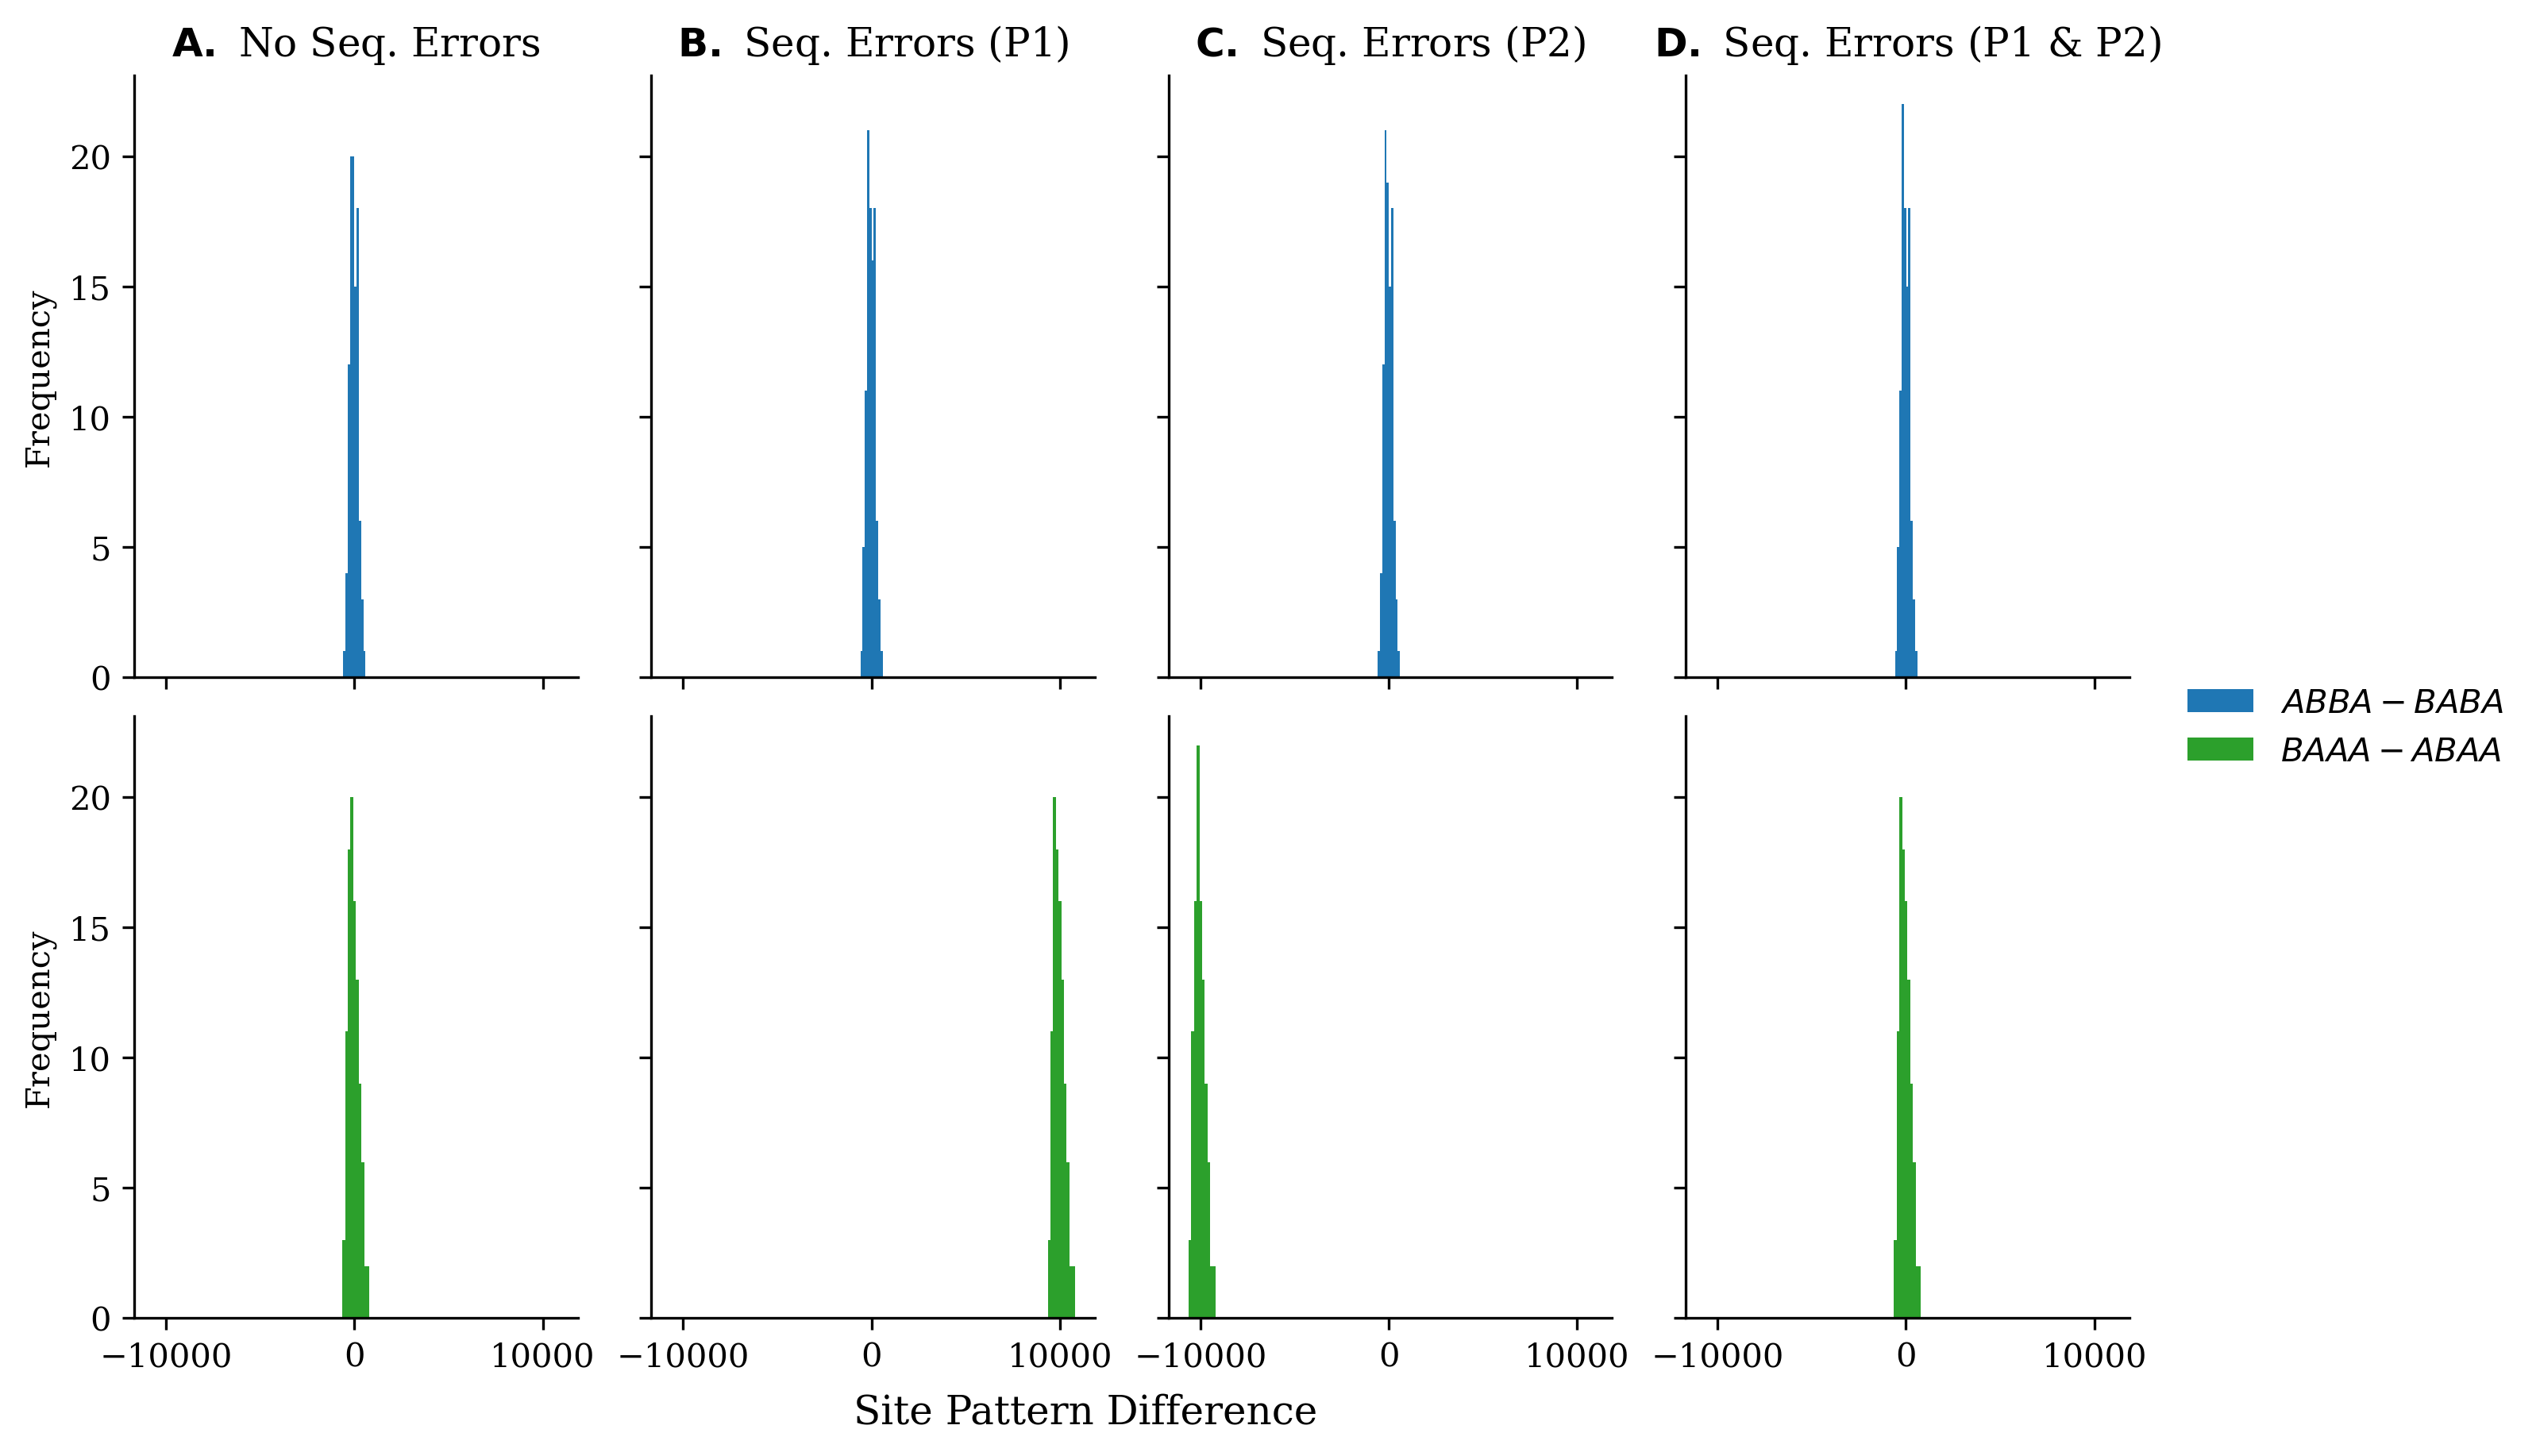

In [12]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig, axes = plt.subplots(
    2, 4, figsize=(9, 6), dpi=300.0, sharex=True, sharey=True,
    facecolor='white', constrained_layout=True,
)
# Plot abba - baba distributions.
axes[0, 0].hist(org_abba_baba, histtype='stepfilled', color='tab:blue')
axes[0, 1].hist(p1_abba_baba, histtype='stepfilled', color='tab:blue')
axes[0, 2].hist(p2_abba_baba, histtype='stepfilled', color='tab:blue')
axes[0, 3].hist(p1_p2_abba_baba, histtype='stepfilled', color='tab:blue', label=r'$ABBA-BABA$')
# Plot baaa - abaa distributions.
axes[1, 0].hist(org_baaa_abaa, histtype='stepfilled', color='tab:green')
axes[1, 1].hist(p1_baaa_abaa, histtype='stepfilled', color='tab:green')
axes[1, 2].hist(p2_baaa_abaa, histtype='stepfilled', color='tab:green')
axes[1, 3].hist(p1_p2_baaa_abaa, histtype='stepfilled', color='tab:green', label=r'$BAAA-ABAA$')
# Add a figure legend.
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Despine the axes.
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 2].spines['top'].set_visible(False)
axes[0, 2].spines['right'].set_visible(False)
axes[0, 3].spines['top'].set_visible(False)
axes[0, 3].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 2].spines['top'].set_visible(False)
axes[1, 2].spines['right'].set_visible(False)
axes[1, 3].spines['top'].set_visible(False)
axes[1, 3].spines['right'].set_visible(False)
# Plot the titles.
axes[0, 0].set_title(r'$\bf{A.}$'+' No Seq. Errors')
axes[0, 1].set_title(r'$\bf{B.}$'+' Seq. Errors (P1)')
axes[0, 2].set_title(r'$\bf{C.}$'+' Seq. Errors (P2)')
axes[0, 3].set_title(r'$\bf{D.}$'+' Seq. Errors (P1 & P2)')
# Plot the axes labels.
axes[0, 0].set_ylabel('Frequency')
axes[1, 0].set_ylabel('Frequency')
fig.supxlabel('Site Pattern Difference')
# Show the plot!
plt.show()

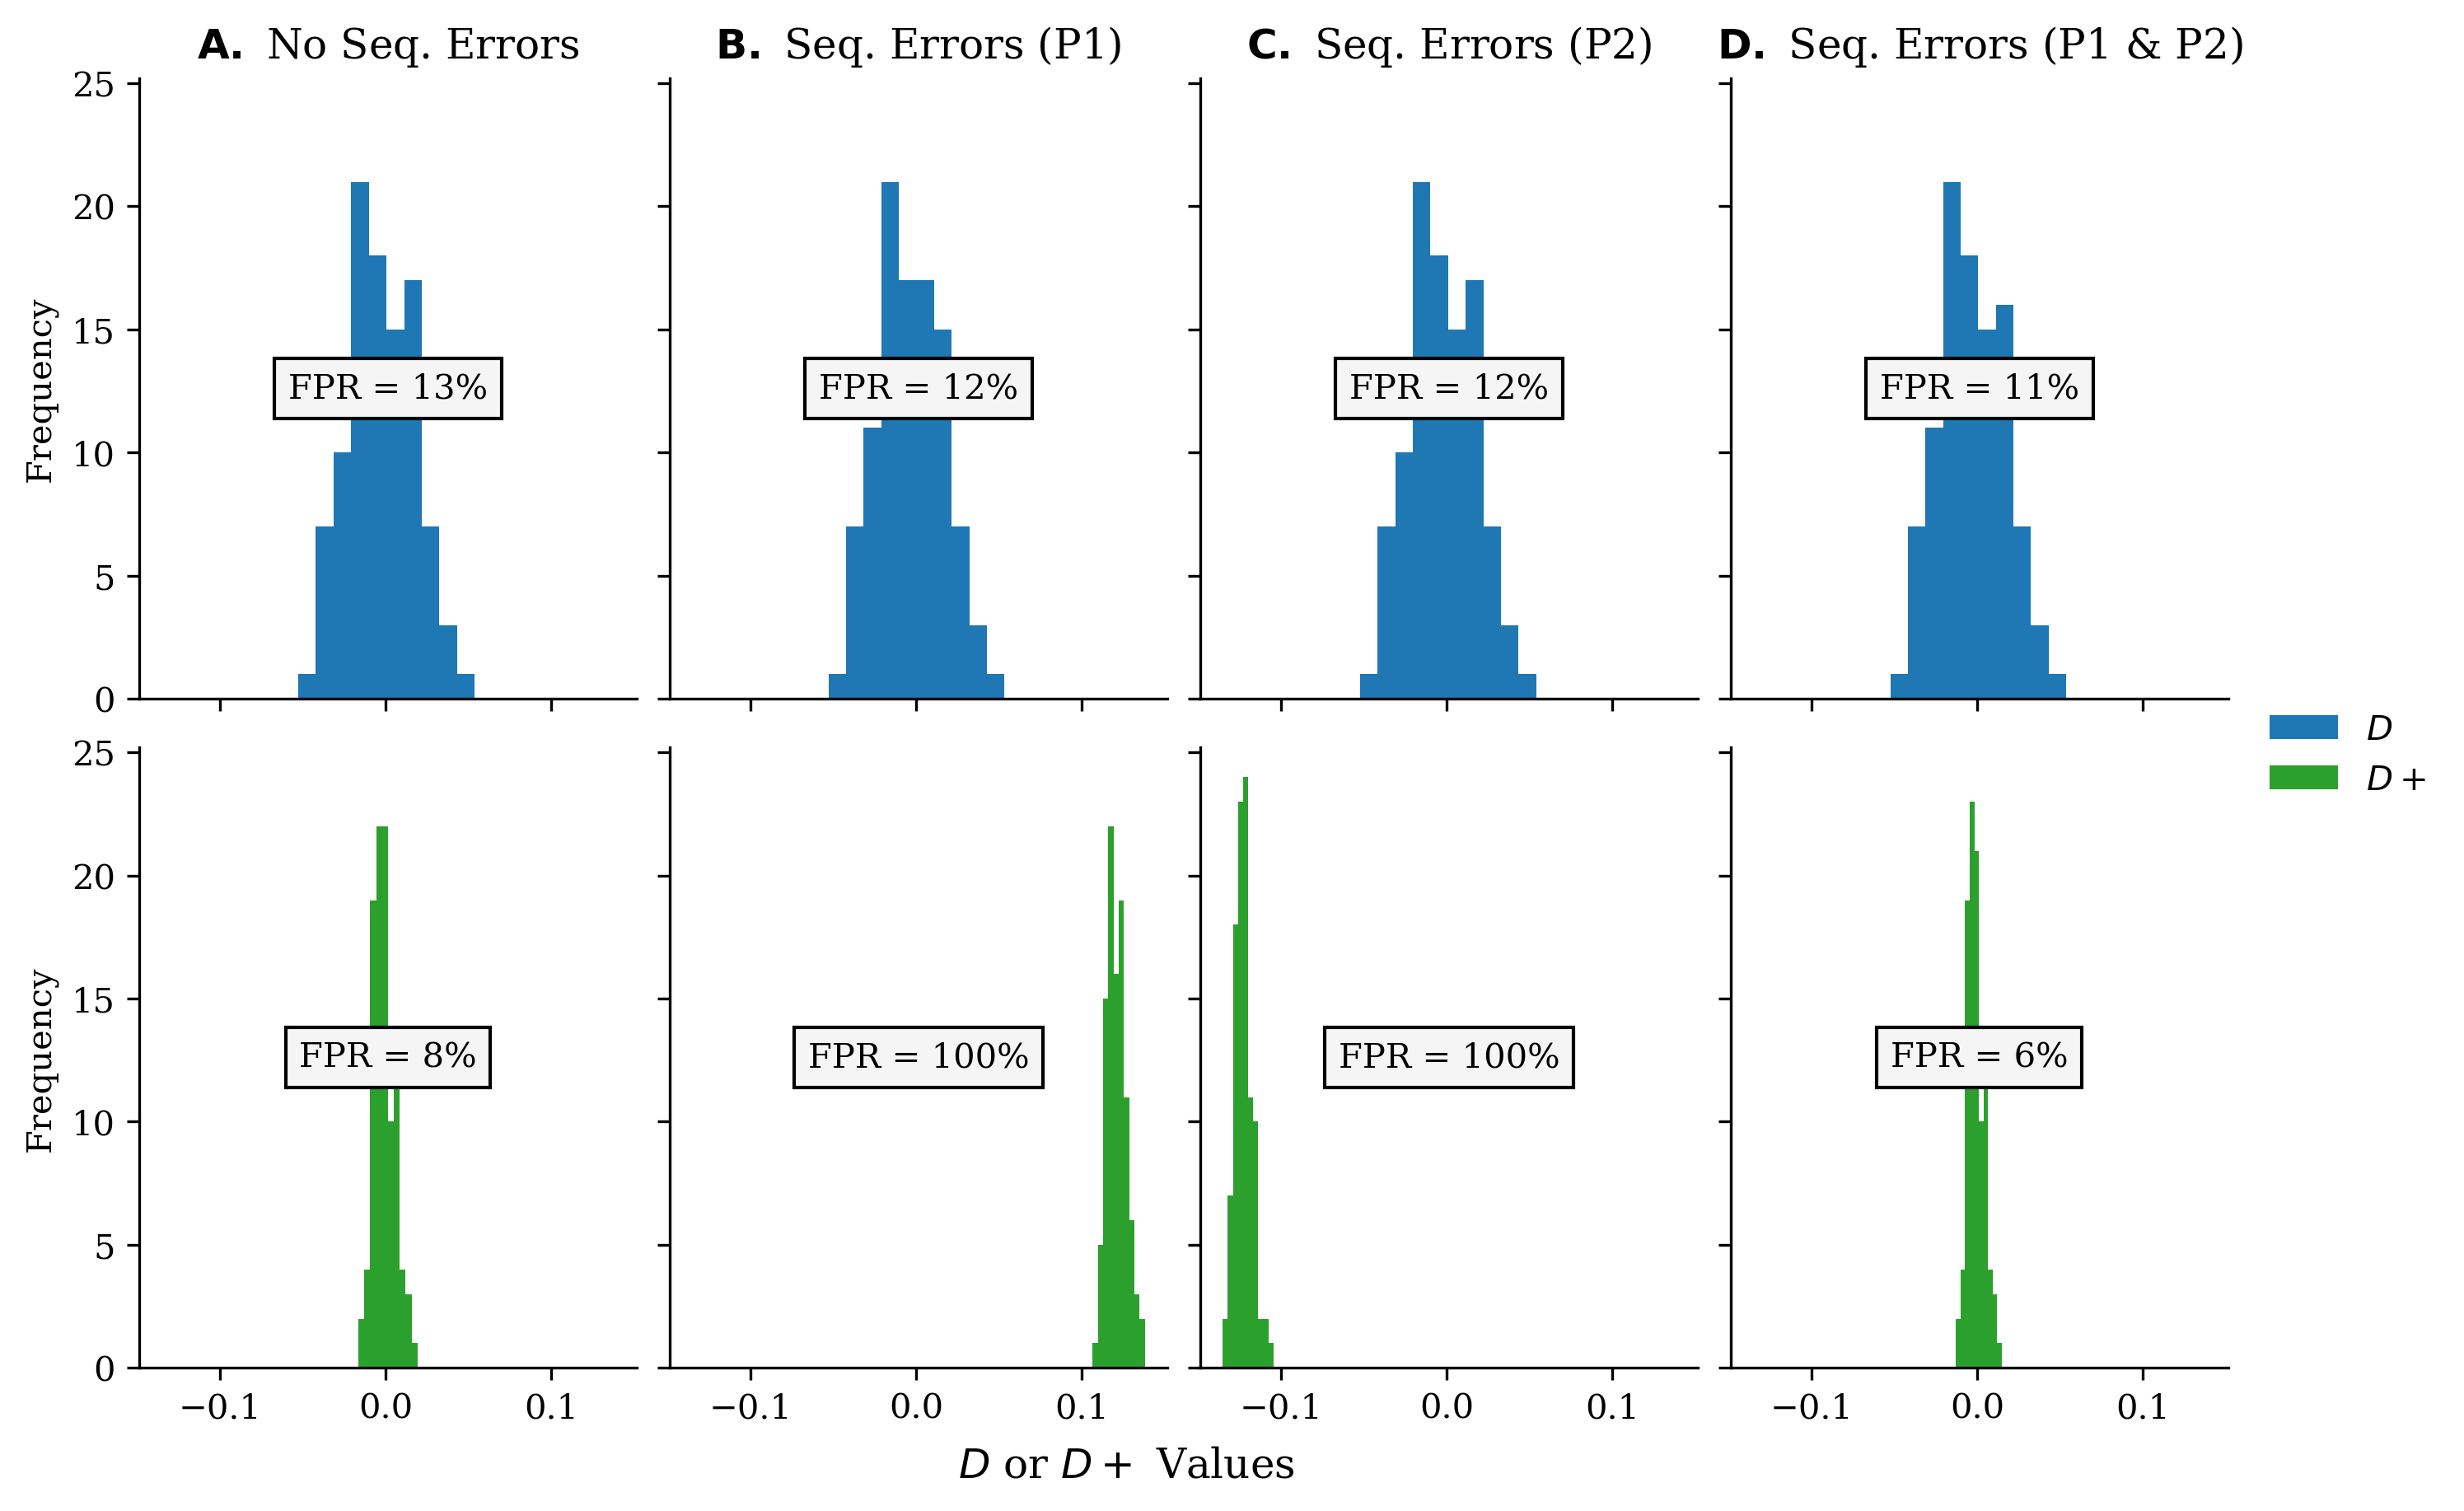

In [13]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig, axes = plt.subplots(
    2, 4, figsize=(9, 6), dpi=300.0, sharex=True, sharey=True,
    facecolor='white', constrained_layout=True,
)
# Plot abba - baba distributions.
axes[0, 0].hist(org_val['d'], histtype='stepfilled', color='tab:blue')
axes[0, 0].text(
    0.5, 0.5, 'FPR = '+str(round(org_fpr['d'] * 100))+'%',
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 0].transAxes,
    bbox=dict(facecolor='whitesmoke', edgecolor='black'),
)
axes[0, 1].hist(p1_val['d'], histtype='stepfilled', color='tab:blue')
axes[0, 1].text(
    0.5, 0.5, 'FPR = '+str(round(p1_fpr['d'] * 100))+'%',
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 1].transAxes,
    bbox=dict(facecolor='whitesmoke', edgecolor='black'),
)
axes[0, 2].hist(p2_val['d'], histtype='stepfilled', color='tab:blue')
axes[0, 2].text(
    0.5, 0.5, 'FPR = '+str(round(p2_fpr['d'] * 100))+'%',
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 2].transAxes,
    bbox=dict(facecolor='whitesmoke', edgecolor='black'),
)
axes[0, 3].hist(p1_p2_val['d'], histtype='stepfilled', color='tab:blue', label=r'$D$')
axes[0, 3].text(
    0.5, 0.5, 'FPR = '+str(round(p1_p2_fpr['d'] * 100))+'%',
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 3].transAxes,
    bbox=dict(facecolor='whitesmoke', edgecolor='black'),
)
# Plot baaa - abaa distributions.
axes[1, 0].hist(org_val['dplus'], histtype='stepfilled', color='tab:green')
axes[1, 0].text(
    0.5, 0.5, 'FPR = '+str(round(org_fpr['dplus'] * 100))+'%',
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 0].transAxes,
    bbox=dict(facecolor='whitesmoke', edgecolor='black'),
)
axes[1, 1].hist(p1_val['dplus'], histtype='stepfilled', color='tab:green')
axes[1, 1].text(
    0.5, 0.5, 'FPR = '+str(round(p1_fpr['dplus'] * 100))+'%',
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 1].transAxes,
    bbox=dict(facecolor='whitesmoke', edgecolor='black'),
)
axes[1, 2].hist(p2_val['dplus'], histtype='stepfilled', color='tab:green')
axes[1, 2].text(
    0.5, 0.5, 'FPR = '+str(round(p2_fpr['dplus'] * 100))+'%',
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 2].transAxes,
    bbox=dict(facecolor='whitesmoke', edgecolor='black'),
)
axes[1, 3].hist(p1_p2_val['dplus'], histtype='stepfilled', color='tab:green', label=r'$D+$')
axes[1, 3].text(
    0.5, 0.5, 'FPR = '+str(round(p1_p2_fpr['dplus'] * 100))+'%',
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 3].transAxes,
    bbox=dict(facecolor='whitesmoke', edgecolor='black'),
)
# Add a figure legend.
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Despine the axes.
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 2].spines['top'].set_visible(False)
axes[0, 2].spines['right'].set_visible(False)
axes[0, 3].spines['top'].set_visible(False)
axes[0, 3].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 2].spines['top'].set_visible(False)
axes[1, 2].spines['right'].set_visible(False)
axes[1, 3].spines['top'].set_visible(False)
axes[1, 3].spines['right'].set_visible(False)
# Plot the titles.
axes[0, 0].set_title(r'$\bf{A.}$'+' No Seq. Errors')
axes[0, 1].set_title(r'$\bf{B.}$'+' Seq. Errors (P1)')
axes[0, 2].set_title(r'$\bf{C.}$'+' Seq. Errors (P2)')
axes[0, 3].set_title(r'$\bf{D.}$'+' Seq. Errors (P1 & P2)')
# Plot the axes labels.
axes[0, 0].set_ylabel('Frequency')
axes[1, 0].set_ylabel('Frequency')
fig.supxlabel(r'$D$'+' or 'r'$D+$'+' Values')
# Show the plot!
plt.show()

## 50kb Windows

In [14]:
# Define a function to extract observed introgression values.
def err_wind_vals(err_pop):
    # Define the file path for the results.
    results_path = './seq_errors/wind_vals/{0}/rep_id_'.format(err_pop)
    # Intialize arrays to store observed values.
    wind_d = np.array([])
    wind_dplus = np.array([])
    # For all replicates.
    for rep_id in range(1, 101):
        # Load the observed values.
        d = np.loadtxt(
            results_path+'{0}_d.csv.gz'.format(rep_id),
            delimiter=',',
        )
        dplus = np.loadtxt(
            results_path+'{0}_dplus.csv.gz'.format(rep_id),
            delimiter=',',
        )
        # Append the observed value arrays.
        wind_d = np.append(wind_d, d)
        wind_dplus = np.append(wind_dplus, dplus)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    wind_vals_dict = {
        'd': wind_d,
        'dplus': wind_dplus,
    }
    return wind_vals_dict

In [43]:
# Define a function to calculate power for introgression detection metrics.
def err_wind_power(err_pop, wind_dict, pval):
    # Calculate critical values.
    d_cv_upper = np.nanquantile(wind_dict['d'], (1-np.round(pval/2, 4)))
    dplus_cv_upper = np.nanquantile(wind_dict['dplus'], (1-np.round(pval/2, 4)))
    d_cv_lower = np.nanquantile(wind_dict['d'], (np.round(pval/2, 4)))
    dplus_cv_lower = np.nanquantile(wind_dict['dplus'], (np.round(pval/2, 4)))
    # Calculate the power ie the number of significant replicates out of 100.
    d_power = np.nanmean(wind_dict['d'] >= d_cv_upper) + np.nanmean(wind_dict['d'] <= d_cv_lower)
    dplus_power = np.nanmean(wind_dict['dplus'] >= dplus_cv_upper) + np.nanmean(wind_dict['dplus'] <= dplus_cv_lower)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    power_dict = {
        'd': d_power, 'dplus': dplus_power,
    }
    return power_dict

In [16]:
# Define a function to extract synthetic error results.
def err_syn_vals(err_pop):
    # Define the file path for the results.
    results_path = './seq_errors/synthetic_errors/0.001/rep_id_'
    # Intialize arrays to store observed values.
    wind_syn = np.array([])
    # For all replicates.
    for rep_id in range(1, 101):
        # Load the observed values.
        syn = np.loadtxt(
            results_path+'{0}_{1}.csv.gz'.format(rep_id, err_pop),
            delimiter=',',
        )
        # Append the observed value arrays.
        wind_syn = np.append(wind_syn, syn)
    return wind_syn

In [17]:
# Load the results.
p1_syn = err_syn_vals('p1')
p2_syn = err_syn_vals('p2')
p1_p2_syn = err_syn_vals('p1_p2')

In [18]:
# Load the results.
org_winds = err_wind_vals('org')
p1_winds = err_wind_vals('p1')
p2_winds = err_wind_vals('p2')
p1_p2_winds = err_wind_vals('p1_p2')

In [44]:
# Determine the critical values.
cvs = np.arange(0.01, 1.01, 0.01)
# Intialize dictionaries.
org_fpr_winds = {'d': [], 'dplus': []}
p1_fpr_winds = {'d': [], 'dplus': []}
p2_fpr_winds = {'d': [], 'dplus': []}
p1_p2_fpr_winds = {'d': [], 'dplus': []}
# For all critical values...
for cv in cvs:
    # Calculate the results.
    org_dicc = err_wind_power('org', org_winds, cv)
    p1_dicc = err_wind_power('p1', p1_winds, cv)
    p2_dicc = err_wind_power('p2', p2_winds, cv)
    p1_p2_dicc = err_wind_power('p1_p2', p1_p2_winds, cv)
    # Fill the dictionaries.
    org_fpr_winds['d'].append(org_dicc['d'])
    org_fpr_winds['dplus'].append(org_dicc['dplus'])
    p1_fpr_winds['d'].append(p1_dicc['d'])
    p1_fpr_winds['dplus'].append(p1_dicc['dplus'])
    p2_fpr_winds['d'].append(p2_dicc['d'])
    p2_fpr_winds['dplus'].append(p2_dicc['dplus'])
    p1_p2_fpr_winds['d'].append(p1_p2_dicc['d'])
    p1_p2_fpr_winds['dplus'].append(p1_p2_dicc['dplus'])

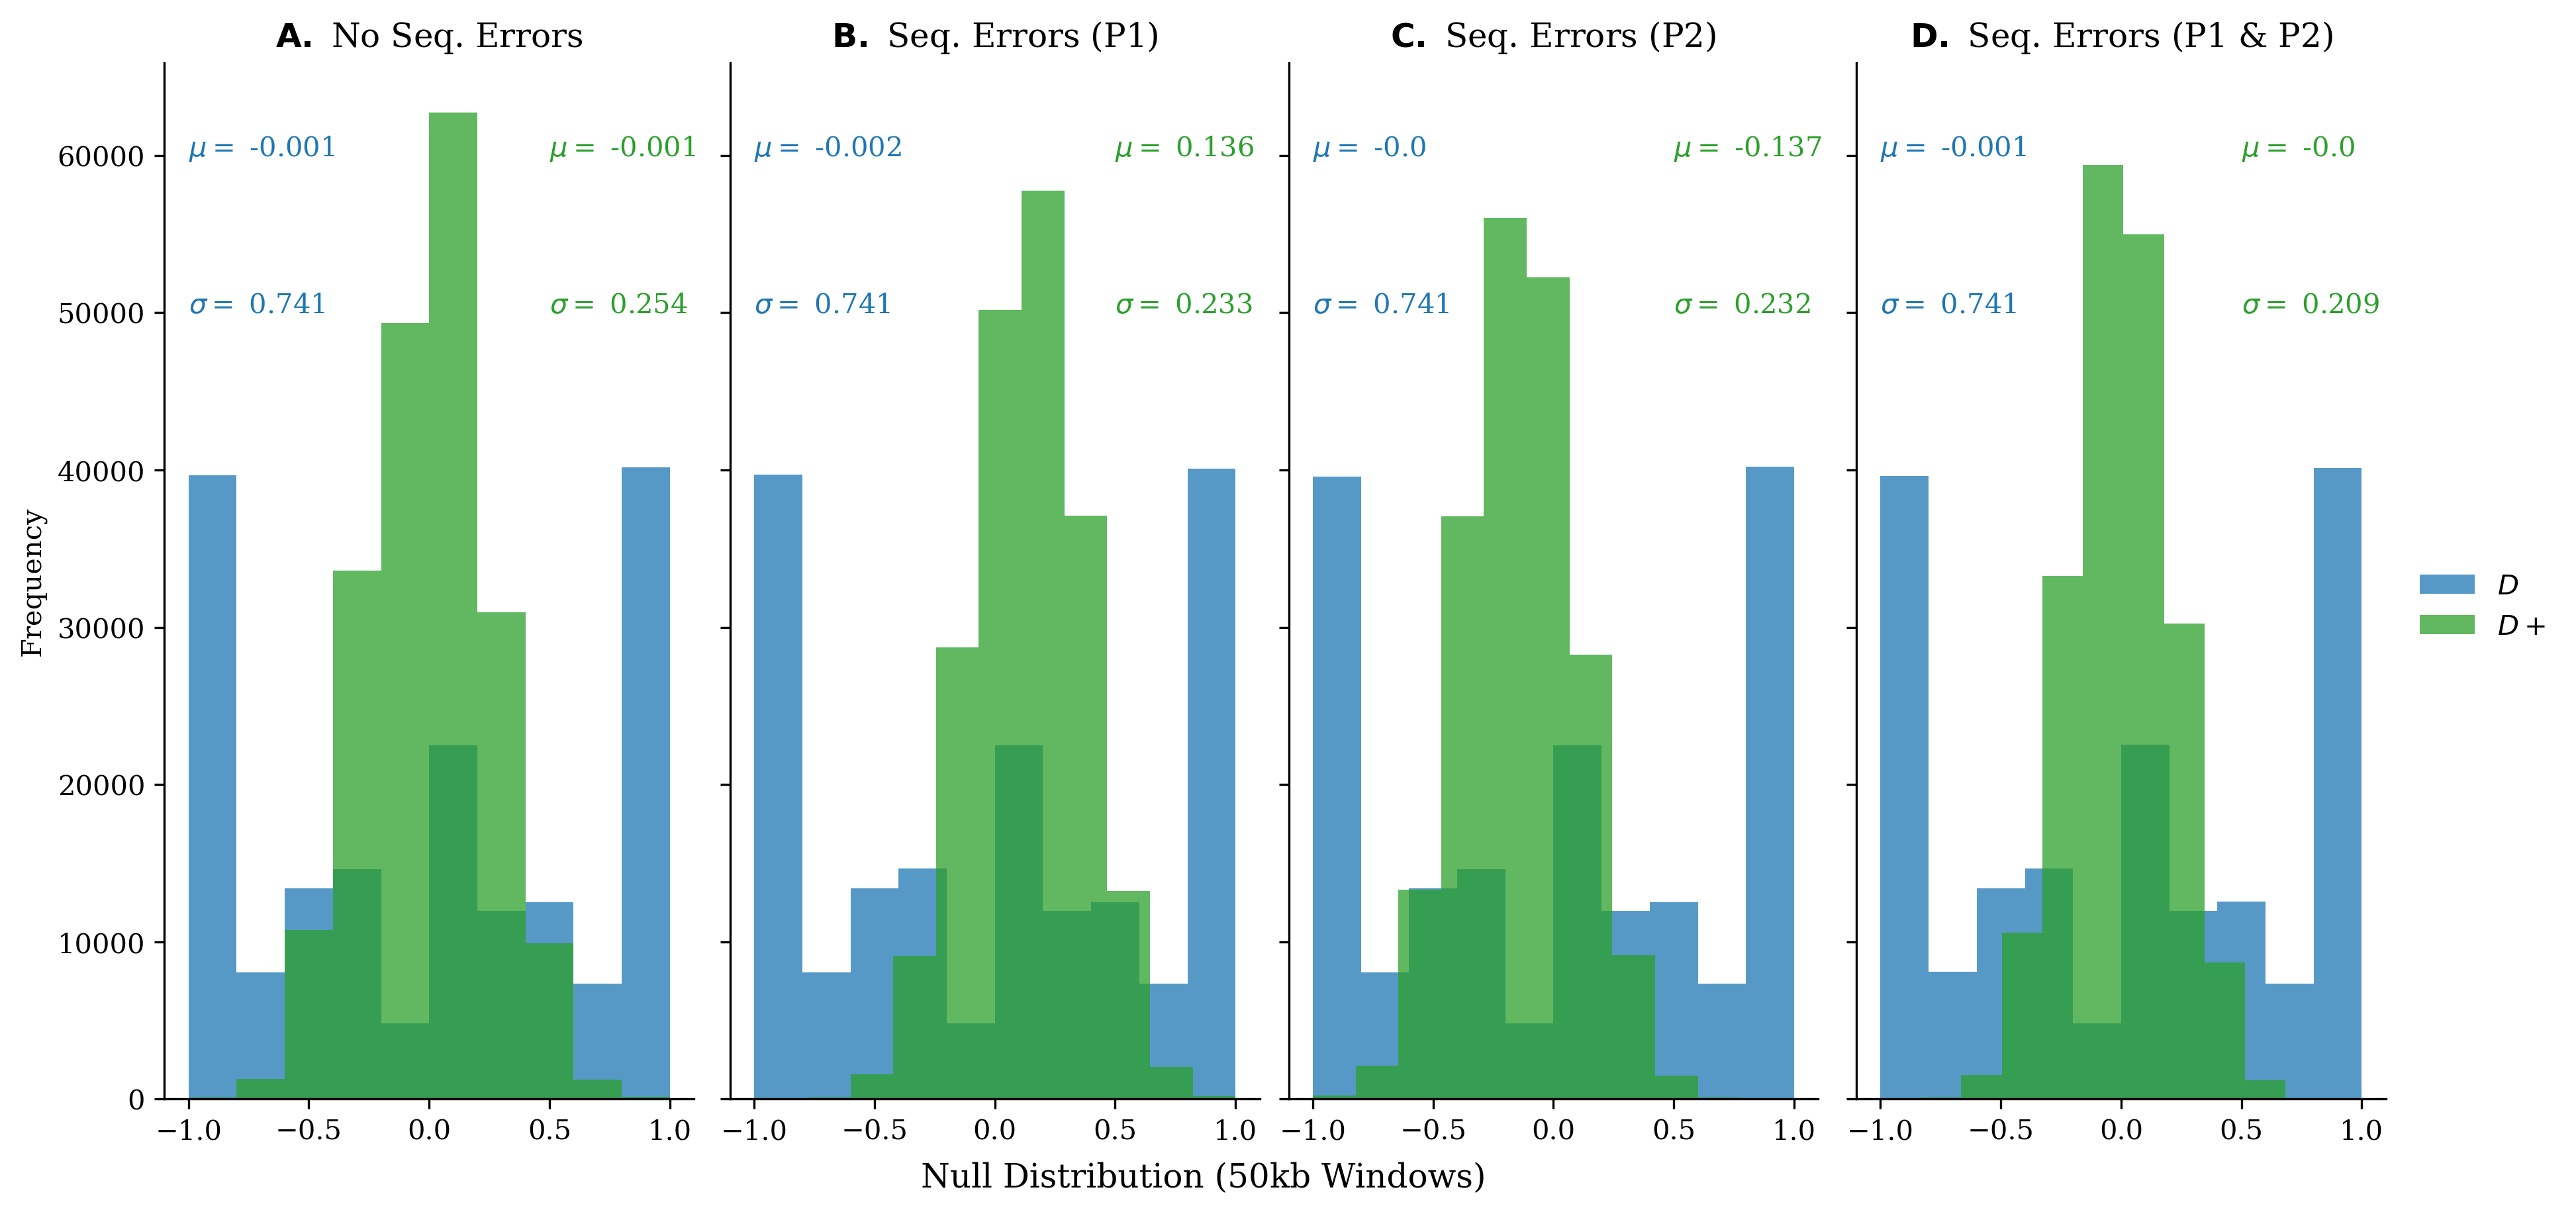

In [24]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig, axes = plt.subplots(
    1, 4, figsize=(12, 6), dpi=300.0, sharex=True, sharey=True,
    facecolor='white', constrained_layout=True,
)
# Plot distributions.
axes[0].hist(org_winds['d'], histtype='stepfilled', color='tab:blue', alpha=0.75)
axes[1].hist(p1_winds['d'], histtype='stepfilled', color='tab:blue', alpha=0.75)
axes[2].hist(p2_winds['d'], histtype='stepfilled', color='tab:blue', alpha=0.75)
axes[3].hist(p1_p2_winds['d'], histtype='stepfilled', color='tab:blue', alpha=0.75, label=r'$D$')
axes[0].text(-1, 60000, r'$\mu = $'+' {0}'.format(round(np.nanmean(org_winds['d']), 3)), color='tab:blue')
axes[0].text(-1, 50000, r'$\sigma = $'+' {0}'.format(round(np.nanstd(org_winds['d']), 3)), color='tab:blue')
axes[1].text(-1, 60000, r'$\mu = $'+' {0}'.format(round(np.nanmean(p1_winds['d']), 3)), color='tab:blue')
axes[1].text(-1, 50000, r'$\sigma = $'+' {0}'.format(round(np.nanstd(p1_winds['d']), 3)), color='tab:blue')
axes[2].text(-1, 60000, r'$\mu = $'+' {0}'.format(round(np.nanmean(p2_winds['d']), 3)), color='tab:blue')
axes[2].text(-1, 50000, r'$\sigma = $'+' {0}'.format(round(np.nanstd(p2_winds['d']), 3)), color='tab:blue')
axes[3].text(-1, 60000, r'$\mu = $'+' {0}'.format(round(np.nanmean(p1_p2_winds['d']), 3)), color='tab:blue')
axes[3].text(-1, 50000, r'$\sigma = $'+' {0}'.format(round(np.nanstd(p1_p2_winds['d']), 3)), color='tab:blue')
# Plot distributions.
axes[0].hist(org_winds['dplus'], histtype='stepfilled', color='tab:green', alpha=0.75)
axes[1].hist(p1_winds['dplus'], histtype='stepfilled', color='tab:green', alpha=0.75)
axes[2].hist(p2_winds['dplus'], histtype='stepfilled', color='tab:green', alpha=0.75)
axes[3].hist(p1_p2_winds['dplus'], histtype='stepfilled', color='tab:green', alpha=0.75, label=r'$D+$')
axes[0].text(0.5, 60000, r'$\mu = $'+' {0}'.format(round(np.nanmean(org_winds['dplus']), 3)), color='tab:green')
axes[0].text(0.5, 50000, r'$\sigma = $'+' {0}'.format(round(np.nanstd(org_winds['dplus']), 3)), color='tab:green')
axes[1].text(0.5, 60000, r'$\mu = $'+' {0}'.format(round(np.nanmean(p1_winds['dplus']), 3)), color='tab:green')
axes[1].text(0.5, 50000, r'$\sigma = $'+' {0}'.format(round(np.nanstd(p1_winds['dplus']), 3)), color='tab:green')
axes[2].text(0.5, 60000, r'$\mu = $'+' {0}'.format(round(np.nanmean(p2_winds['dplus']), 3)), color='tab:green')
axes[2].text(0.5, 50000, r'$\sigma = $'+' {0}'.format(round(np.nanstd(p2_winds['dplus']), 3)), color='tab:green')
axes[3].text(0.5, 60000, r'$\mu = $'+' {0}'.format(round(np.nanmean(p1_p2_winds['dplus']), 3)), color='tab:green')
axes[3].text(0.5, 50000, r'$\sigma = $'+' {0}'.format(round(np.nanstd(p1_p2_winds['dplus']), 3)), color='tab:green')
# Add a figure legend.
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Despine the axes.
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['top'].set_visible(False)
axes[3].spines['right'].set_visible(False)
# Plot the titles.
axes[0].set_title(r'$\bf{A.}$'+' No Seq. Errors')
axes[1].set_title(r'$\bf{B.}$'+' Seq. Errors (P1)')
axes[2].set_title(r'$\bf{C.}$'+' Seq. Errors (P2)')
axes[3].set_title(r'$\bf{D.}$'+' Seq. Errors (P1 & P2)')
# Plot the axes labels.
axes[0].set_ylabel('Frequency')
fig.supxlabel('Null Distribution (50kb Windows)')
# Show the plot!
plt.show()

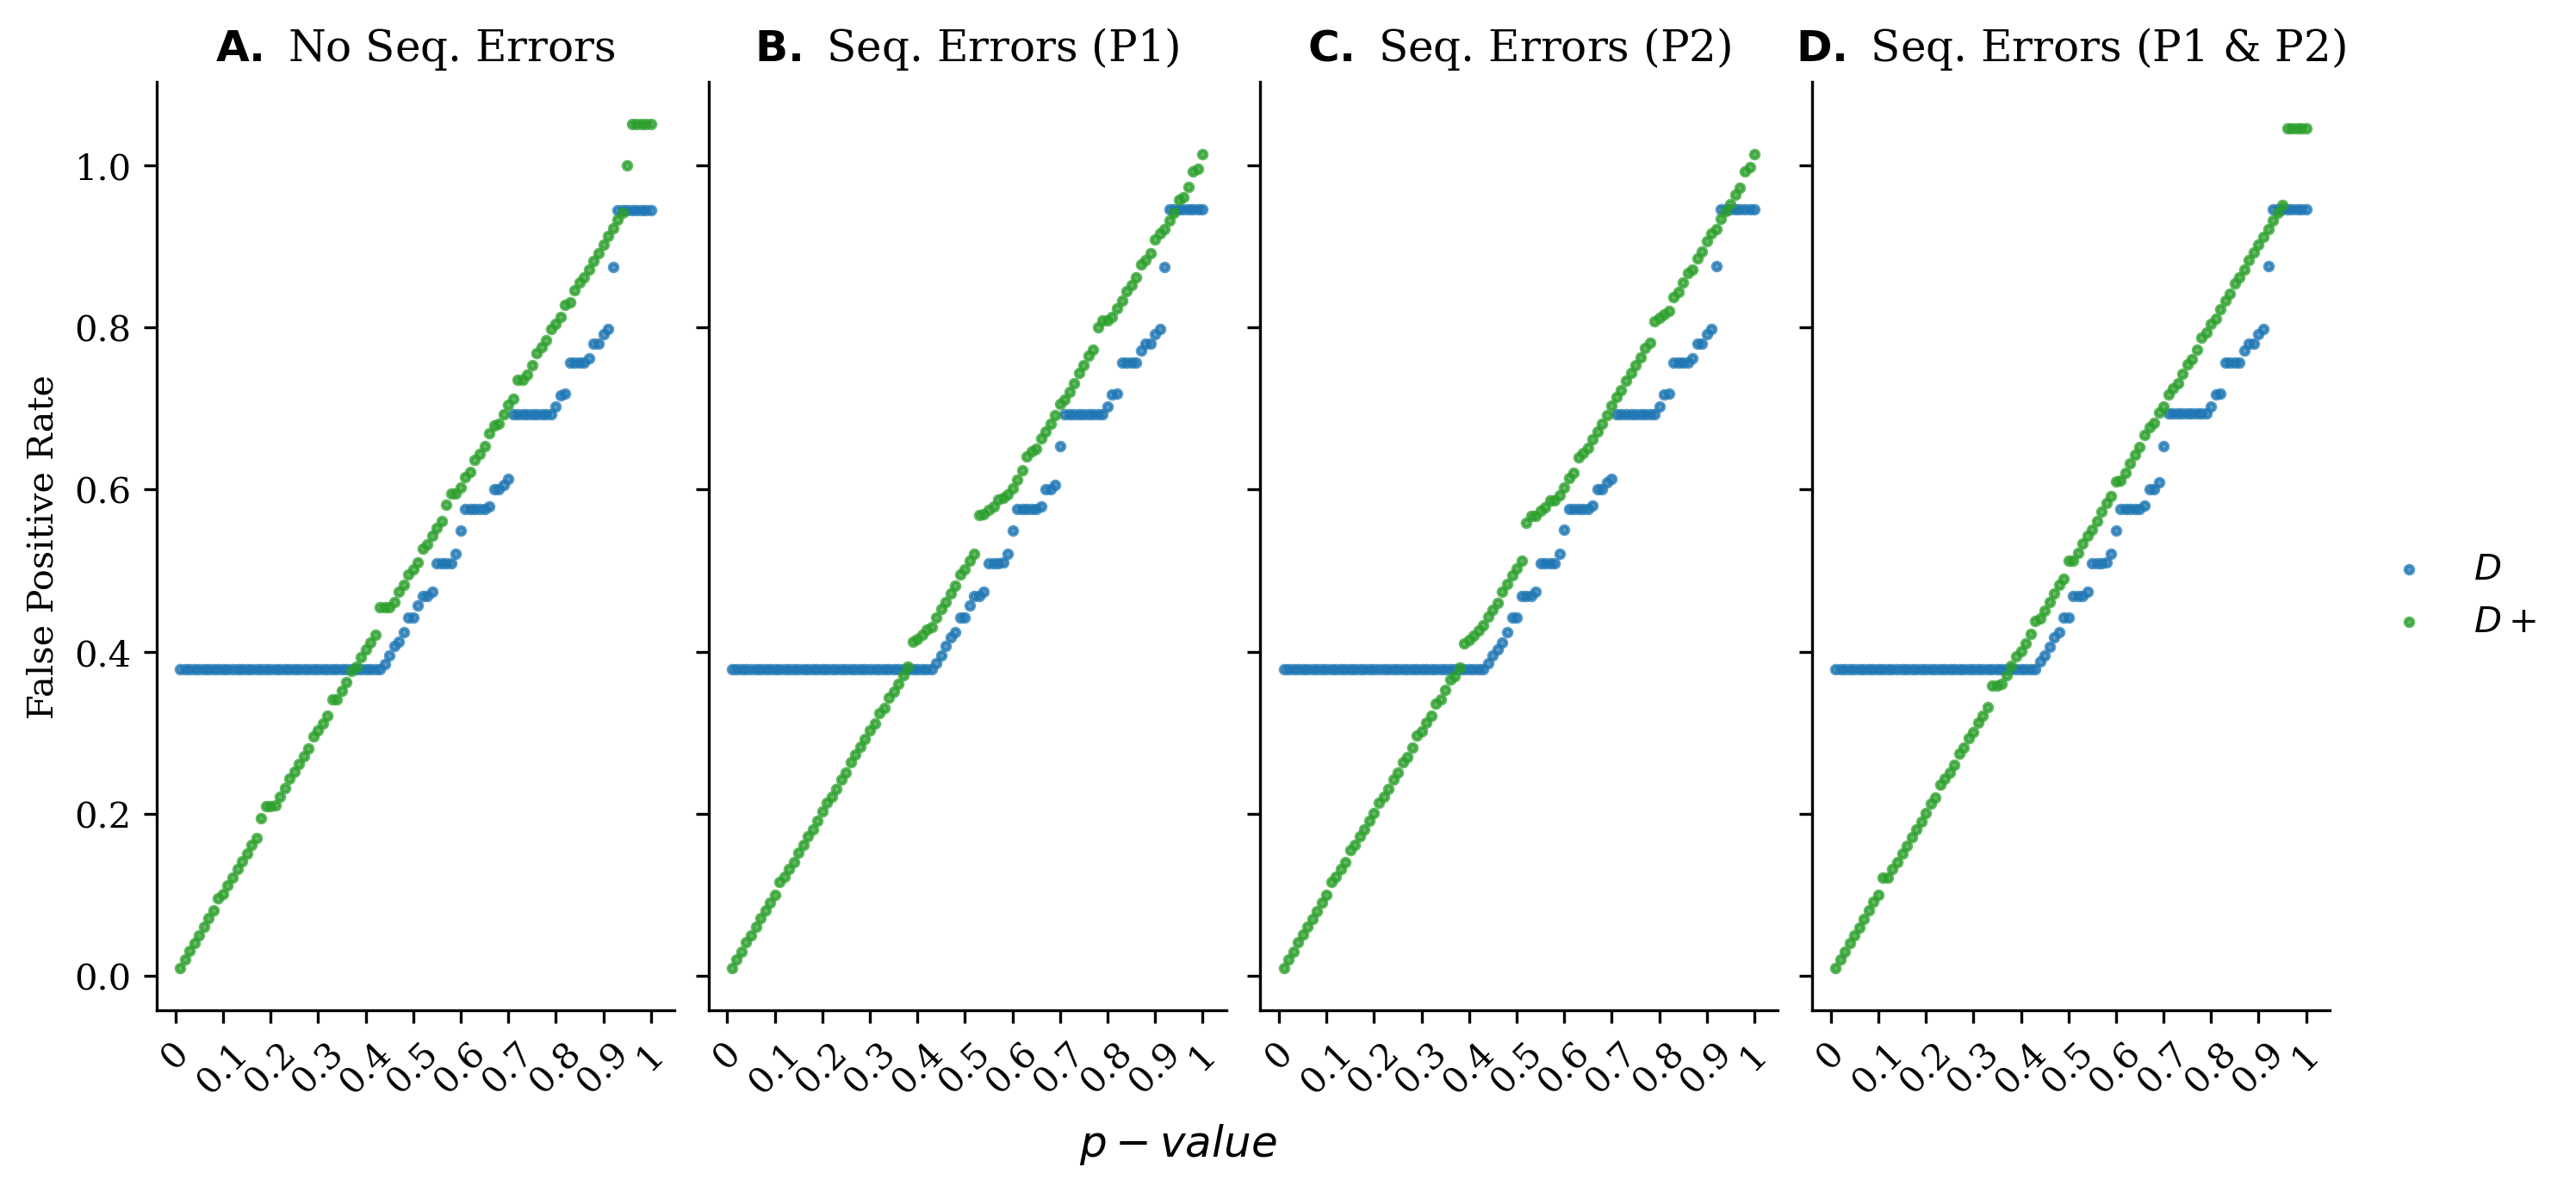

In [45]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig, axes = plt.subplots(
    1, 4, figsize=(9, 4.5), dpi=300.0, sharex=True, sharey=True,
    facecolor='white', constrained_layout=True,
)
# Plot abba - baba distributions.
axes[0].scatter(cvs, org_fpr_winds['d'], s=5, color='tab:blue', alpha=0.75)
axes[1].scatter(cvs, p1_fpr_winds['d'], s=5, color='tab:blue', alpha=0.75)
axes[2].scatter(cvs, p2_fpr_winds['d'], s=5, color='tab:blue', alpha=0.75)
axes[3].scatter(cvs, p1_p2_fpr_winds['d'], s=5, color='tab:blue', alpha=0.75, label=r'$D$')
# Plot baaa - abaa distributions.
axes[0].scatter(cvs, org_fpr_winds['dplus'], s=5, color='tab:green', alpha=0.75)
axes[1].scatter(cvs, p1_fpr_winds['dplus'], s=5, color='tab:green', alpha=0.75)
axes[2].scatter(cvs, p2_fpr_winds['dplus'], s=5, color='tab:green', alpha=0.75)
axes[3].scatter(cvs, p1_p2_fpr_winds['dplus'], s=5, color='tab:green', alpha=0.75, label=r'$D+$')
# Add a figure legend.
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Despine the axes.
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['top'].set_visible(False)
axes[3].spines['right'].set_visible(False)
# Plot the titles.
axes[0].set_title(r'$\bf{A.}$'+' No Seq. Errors')
axes[1].set_title(r'$\bf{B.}$'+' Seq. Errors (P1)')
axes[2].set_title(r'$\bf{C.}$'+' Seq. Errors (P2)')
axes[3].set_title(r'$\bf{D.}$'+' Seq. Errors (P1 & P2)')
# Set the axis ticks.
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
axes[2].set_xticks(np.arange(0, 1.1, 0.1))
axes[3].set_xticks(np.arange(0, 1.1, 0.1))
axes[0].set_xticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'], rotation=45)
axes[1].set_xticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'], rotation=45)
axes[2].set_xticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'], rotation=45)
axes[3].set_xticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'], rotation=45)
# Plot the axes labels.
axes[0].set_ylabel('False Positive Rate')
fig.supxlabel(r'$p-value$')
# Show the plot!
plt.show()

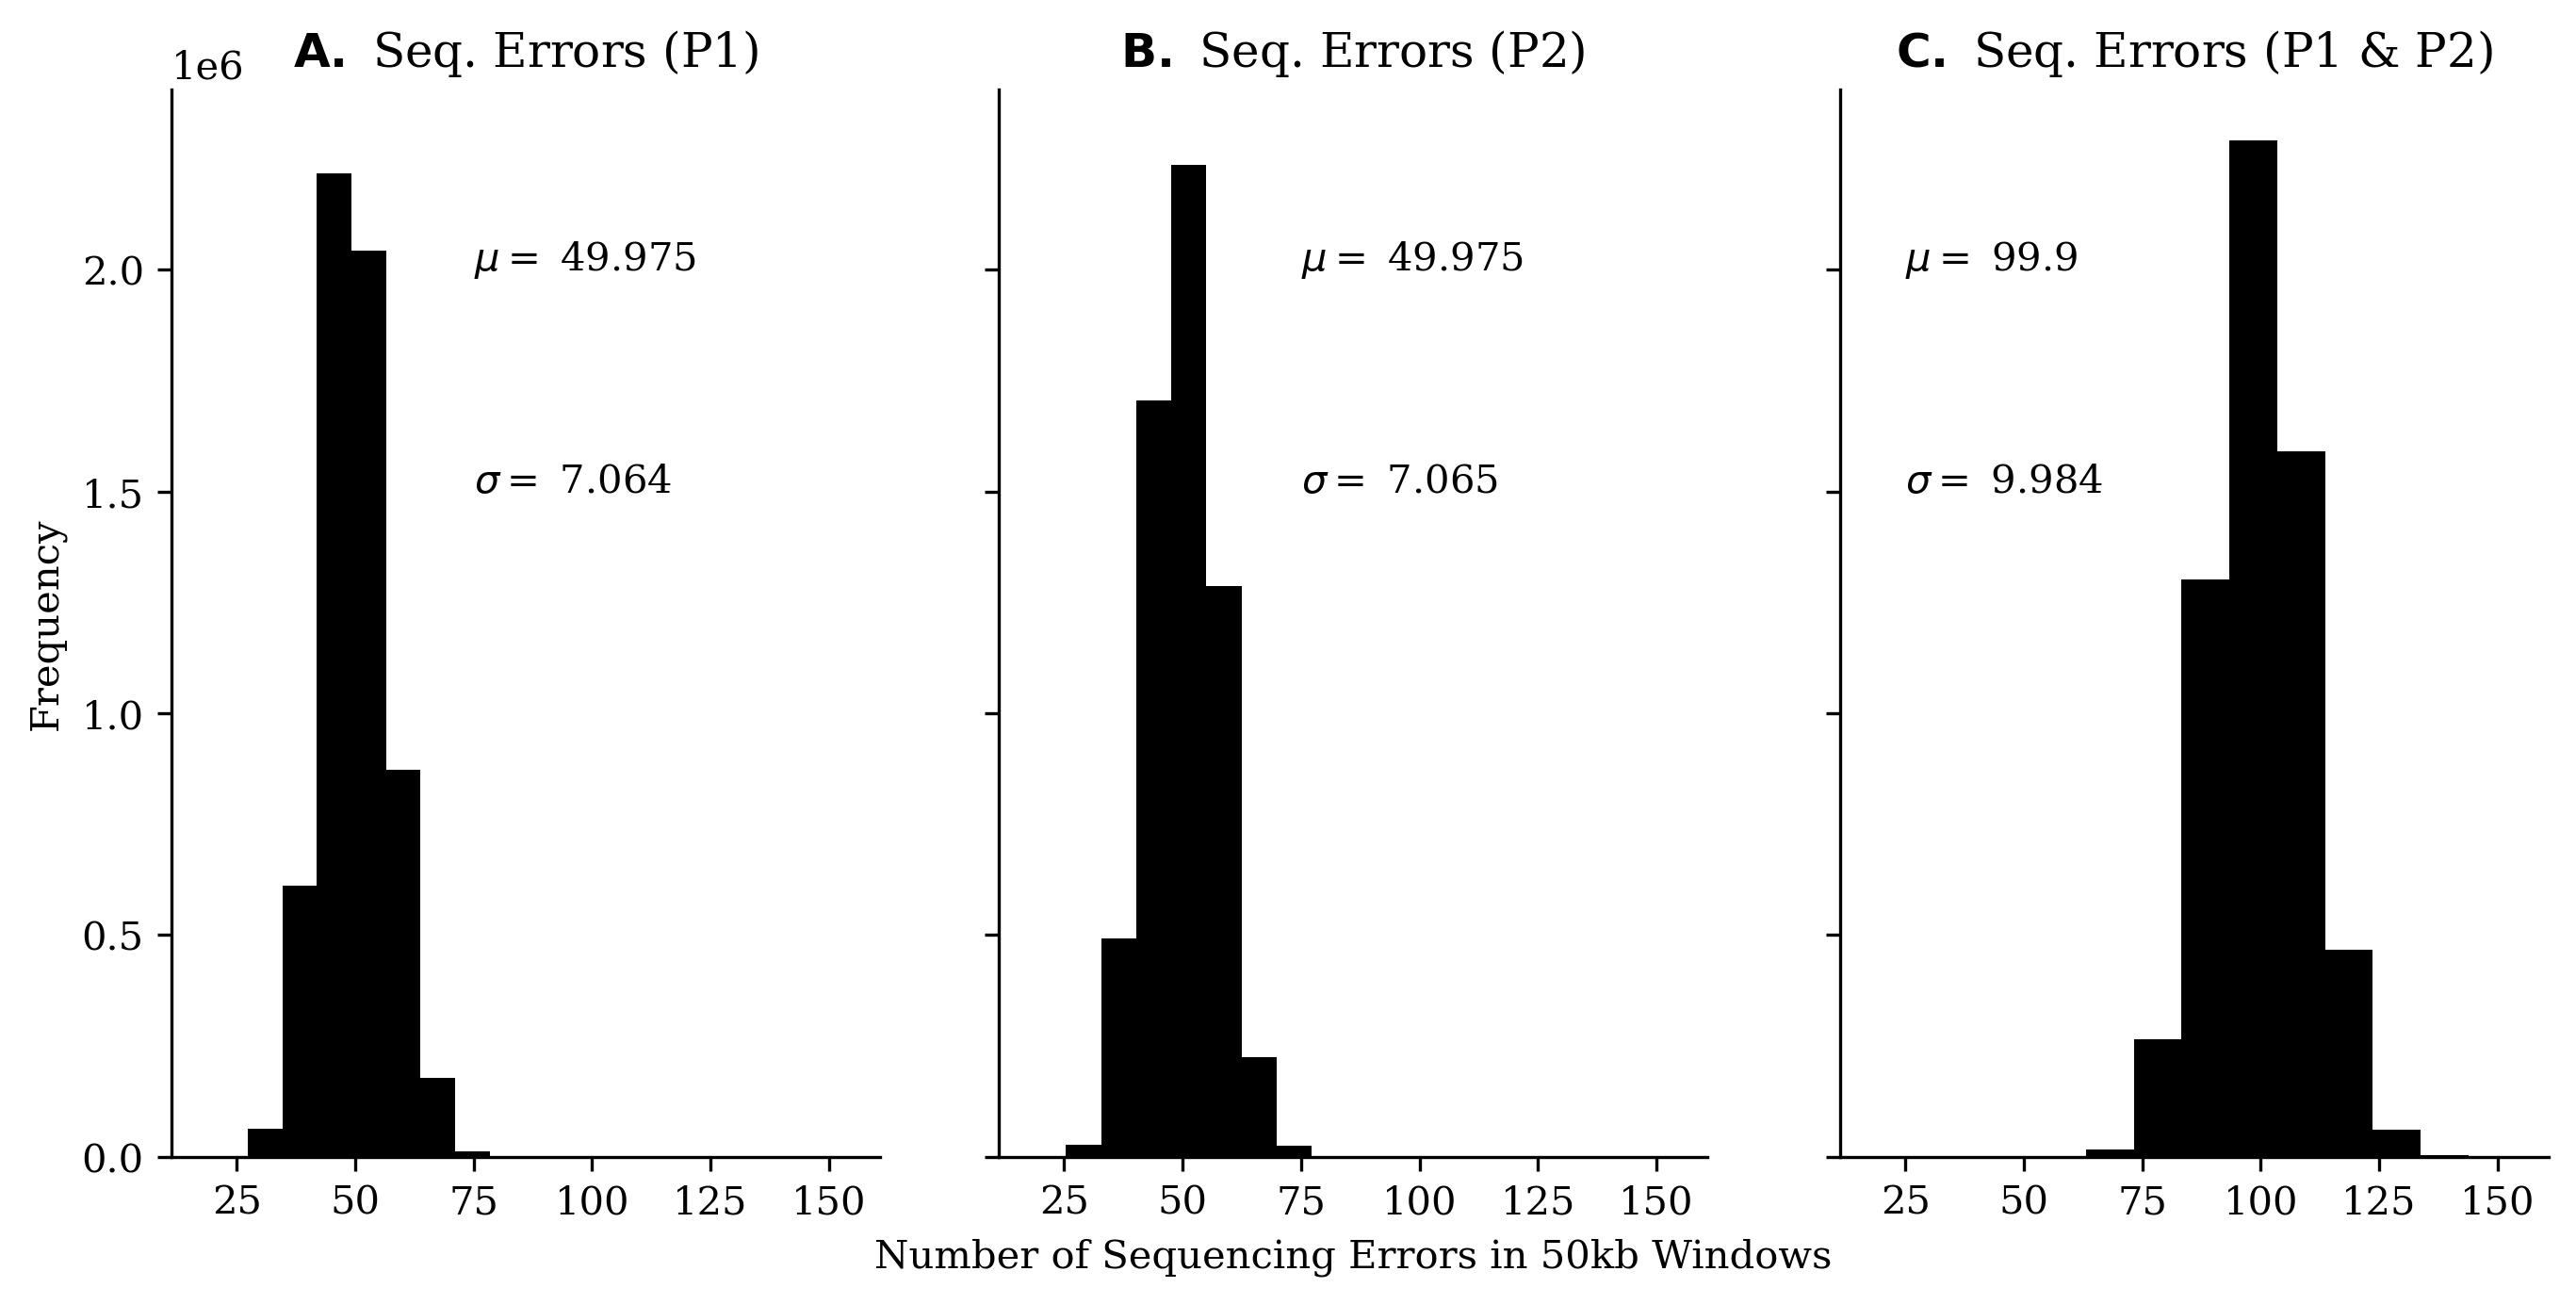

In [26]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig, axes = plt.subplots(
    1, 3, figsize=(9, 4.5), dpi=300.0, sharex=True, sharey=True,
    facecolor='white', constrained_layout=True,
)
# Plot distributions.
axes[0].hist(p1_syn, histtype='stepfilled', color='black')
axes[1].hist(p2_syn, histtype='stepfilled', color='black')
axes[2].hist(p1_p2_syn, histtype='stepfilled', color='black')
# Plot summaries.
axes[0].text(75, 2e6, r'$\mu = $'+' {0}'.format(round(np.nanmean(p1_syn), 3)))
axes[0].text(75, 1.5e6, r'$\sigma = $'+' {0}'.format(round(np.nanstd(p1_syn), 3)))
axes[1].text(75, 2e6, r'$\mu = $'+' {0}'.format(round(np.nanmean(p2_syn), 3)))
axes[1].text(75, 1.5e6, r'$\sigma = $'+' {0}'.format(round(np.nanstd(p2_syn), 3)))
axes[2].text(25, 2e6, r'$\mu = $'+' {0}'.format(round(np.nanmean(p1_p2_syn), 3)))
axes[2].text(25, 1.5e6, r'$\sigma = $'+' {0}'.format(round(np.nanstd(p1_p2_syn), 3)))
# Despine the axes.
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
# Plot the titles.
axes[0].set_title(r'$\bf{A.}$'+' Seq. Errors (P1)')
axes[1].set_title(r'$\bf{B.}$'+' Seq. Errors (P2)')
axes[2].set_title(r'$\bf{C.}$'+' Seq. Errors (P1 & P2)')
# Plot the axes labels.
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Number of Sequencing Errors in 50kb Windows')
# Show the plot!
plt.show()